# 서브플롯_예제(전국_지역별_실업률_변화)

## #01. 데이터 분석 준비

### 패키지 가져오기

In [7]:
from matplotlib import pyplot as plt
from pandas import read_excel, melt
import seaborn as sb
import sys

### 데이터 가져오기

In [3]:
df = read_excel("https://data.hossam.kr/D01/unemployment_age.xlsx", index_col=[0,1]) #시도별, 연령계층별 = 인덱스로 설정
df

2000  2001  2002  2003  2004  ...  2018  2019  2020  2021  2022
시도별     연령계층별                                 ...                              
서울특별시   15-29세   8.1   8.4   8.2   8.8   8.9  ...  10.1   8.8   9.1   9.0   6.8
        30-59세   3.9   3.6   3.0   3.2   3.4  ...   3.5   3.2   3.3   3.6   2.4
        60세이상    2.9   1.9   2.3   1.9   2.1  ...   4.0   4.3   4.7   5.1   3.6
부산광역시   15-29세  12.1  10.7   7.6   9.0   9.9  ...   9.5   9.1  10.6   7.7   6.8
        30-59세   5.5   4.2   2.9   2.9   3.1  ...   3.2   2.4   2.9   2.4   2.2
        60세이상    5.3   3.6   2.1   1.5   1.0  ...   2.9   3.9   3.7   3.3   2.8
대구광역시   15-29세   9.1   9.8   9.2   9.8   8.6  ...  12.2   8.3   9.0   7.1   6.9
        30-59세   3.7   3.5   2.8   3.0   3.2  ...   2.9   2.9   3.0   2.8   2.1
        60세이상    0.7   1.2   1.4   2.2   1.6  ...   3.7   3.1   3.2   4.6   2.9
인천광역시   15-29세   8.2   8.2   7.9   8.8   8.3  ...   9.2   9.0   8.6   7.9   6.7
        30-59세   4.6   3.6   2.8   3.1   3.4  ...   2.9   3.1   3.5   2.8   2.4
        60세이상    3.8   2.5   2.8   2.2   3.2  ...   5.3   5.0   5.2   5.2   3.9
광주광역시   15-29세  12.0   9.4   7.6  10.8   9.5  ...   8.6   9.7   8.8   7.7   6.5
        30-59세   4.7   3.7   2.8   2.8   2.9  ...   2.8   2.5   2.8   2.5   2.1
        60세이상    2.4   1.5   0.9   1.0   0.7  ...   3.0   2.9   3.3   4.2   3.0
대전광역시   15-29세   9.3   9.2   7.8   7.0   9.3  ...  10.5   9.6   7.7   6.9   4.4
        30-59세   3.3   3.0   2.6   2.9   2.7  ...   2.9   2.9   3.5   2.2   1.7
        60세이상    1.3   2.1   1.3   0.9   1.9  ...   3.3   4.2   4.3   3.6   2.9
울산광역시   15-29세   8.3   7.6   5.0   7.5   8.0  ...   9.8   8.8  11.6   8.0   7.8
        30-59세   3.0   2.2   1.7   2.0   2.5  ...   3.3   3.1   2.8   2.4   2.2
        60세이상    3.5   2.6   2.5   1.1   1.0  ...   5.9   5.4   4.5   5.3   4.0
세종특별자치시 15-29세   0.0   0.0   0.0   0.0   0.0  ...   5.9   8.7   7.7   3.9   3.1
        30-59세   0.0   0.0   0.0   0.0   0.0  ...   1.6   1.7   1.8   1.7   1.7
        60세이상    0.0   0.0   0.0   0.0   0.0  ...   2.5   2.7   3.4   2.6   2.6
경기도     15-29세   6.2   5.8   4.9   7.3   7.6  ...   9.0   8.7   8.6   7.6   6.1
        30-59세   3.2   2.9   2.2   2.3   2.5  ...   2.7   2.7   3.0   2.6   2.0
        60세이상    2.7   1.9   1.7   1.7   2.5  ...   3.4   3.9   3.7   4.4   2.6
강원도     15-29세   5.7   4.5   4.8   5.9   6.4  ...   5.2   7.8   8.6   8.1   7.5
        30-59세   2.1   2.0   1.3   1.3   1.3  ...   2.0   2.1   2.5   2.3   1.9
        60세이상    0.5   0.5   0.2   0.5   0.2  ...   4.0   4.9   5.0   4.5   4.1
충청북도    15-29세   7.2   7.8   7.2   7.2   8.0  ...   7.0   8.0   8.1   6.0   5.5
        30-59세   3.0   2.5   1.5   2.5   1.7  ...   1.6   2.1   2.0   1.5   1.8
        60세이상    0.6   0.9   0.3   0.6   0.3  ...   1.6   2.5   3.3   2.8   2.3
충청남도    15-29세   7.2   8.7   6.9   7.6   6.6  ...   9.0   8.2   8.5   4.9   5.1
        30-59세   2.1   1.8   1.9   2.1   1.6  ...   1.9   2.1   2.7   2.0   1.8
        60세이상    0.4   0.3   0.6   0.7   0.5  ...   2.2   1.3   2.4   1.5   2.0
전라북도    15-29세   9.0   9.7   8.3   8.3   9.5  ...  10.0   9.3   9.1   5.9   6.6
        30-59세   2.0   1.9   1.5   1.8   1.7  ...   2.0   2.1   1.8   1.5   1.7
        60세이상    0.1   0.1   0.0   0.3   0.3  ...   0.9   1.0   1.3   2.2   2.1
전라남도    15-29세   8.9   8.1   7.3   7.5   8.1  ...  10.0   9.9   7.0   6.9   6.3
        30-59세   2.8   2.6   1.8   1.9   2.0  ...   2.1   1.7   1.6   1.5   1.7
        60세이상    0.4   0.5   0.2   0.1   0.3  ...   1.4   1.6   2.2   2.5   1.9
경상북도    15-29세   8.8   7.0   5.8   6.6   7.4  ...  12.0  11.2  10.5   8.0   7.4
        30-59세   2.4   2.0   1.7   1.5   1.9  ...   3.1   2.7   3.2   2.6   1.6
        60세이상    0.5   0.3   0.3   0.3   0.4  ...   3.0   3.3   3.3   2.5   2.2
경상남도    15-29세   5.9   6.4   6.0   5.8   5.9  ...   9.6  10.3  10.1   8.5   6.9
        30-59세   3.3   2.8   1.9   2.0   1.8  ...   2.1   2.9   3.4   3.6   2.8
        60세이상    0.5   0.7   0.3   0.6   0.7  ...   2.0   2.8   2.8   3.2   3.0
제주도     15-29세  

## #02. 데이터 전처리

### 1) 인덱스 해제

In [5]:
df2 = df.reset_index()
df2.head()

,시도별,연령계층별,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,서울특별시,15-29세,8.1,8.4,8.2,8.8,8.9,8.9,8.8,7.4,7.6,8.1,8.4,8.3,8.3,8.7,10.4,9.3,10.3,10.1,10.1,8.8,9.1,9.0,6.8
1,서울특별시,30-59세,3.9,3.6,3.0,3.2,3.4,3.6,3.4,3.2,3.0,3.7,3.7,3.6,3.2,3.0,3.2,3.1,2.9,3.3,3.5,3.2,3.3,3.6,2.4
2,서울특별시,60세이상,2.9,1.9,2.3,1.9,2.1,2.1,2.6,1.7,1.8,2.3,4.3,4.1,3.7,2.5,2.8,3.2,2.8,3.6,4.0,4.3,4.7,5.1,3.6
3,부산광역시,15-29세,12.1,10.7,7.6,9.0,9.9,8.8,8.2,8.3,8.1,9.0,8.9,8.8,8.7,8.8,9.0,9.7,9.9,11.5,9.5,9.1,10.6,7.7,6.8
4,부산광역시,30-59세,5.5,4.2,2.9,2.9,3.1,3.3,3.2,3.0,2.9,3.5,2.6,2.7,3.0,3.0,3.0,3.1,2.8,3.2,3.2,2.4,2.9,2.4,2.2


In [6]:
# melt함수(=> 기준이되는 필드, variable(이름지정 : var_name), value(이름지정 : value_name) 필드 생성된다.)/(variable은 서브플롯에서 hue 파라미터로 해결)
# 즉, id_vars는 남기고 싶은 필드, variable(이름지정=var_name)은 카테고리 역할, value(이름지정=value_name)은 데이터역할
df3 = melt(df2, id_vars=['시도별', '연령계층별'], var_name='년도', value_name='실업률')
df3

,시도별,연령계층별,년도,실업률
0,서울특별시,15-29세,2000,8.1
1,서울특별시,30-59세,2000,3.9
2,서울특별시,60세이상,2000,2.9
3,부산광역시,15-29세,2000,12.1
4,부산광역시,30-59세,2000,5.5
...,...,...,...,...
1168,경상남도,30-59세,2022,2.8
1169,경상남도,60세이상,2022,3.0
1170,제주도,15-29세,2022,5.1
1171,제주도,30-59세,2022,1.6


## #03. 시각화

### 그래프 준비하기

In [9]:
plt.rcParams['font.family'] = 'AppleGothic' if sys.platform == 'darwin' else 'Malgun Gothic'
plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (24,8)
plt.rcParams['axes.unicode_minus'] = False

### 년도에 따른 전국 평균 실업률 변화(전체연령)

In [10]:
tdf = df3.filter(['년도','실업률']).groupby(['년도'], as_index=False).mean()
tdf

,년도,실업률
0,2000,4.103922
1,2001,3.762745
2,2002,3.154902
3,2003,3.437255
4,2004,3.582353
5,2005,3.584314
6,2006,3.488235
7,2007,3.343137
8,2008,3.282353
9,2009,3.684314


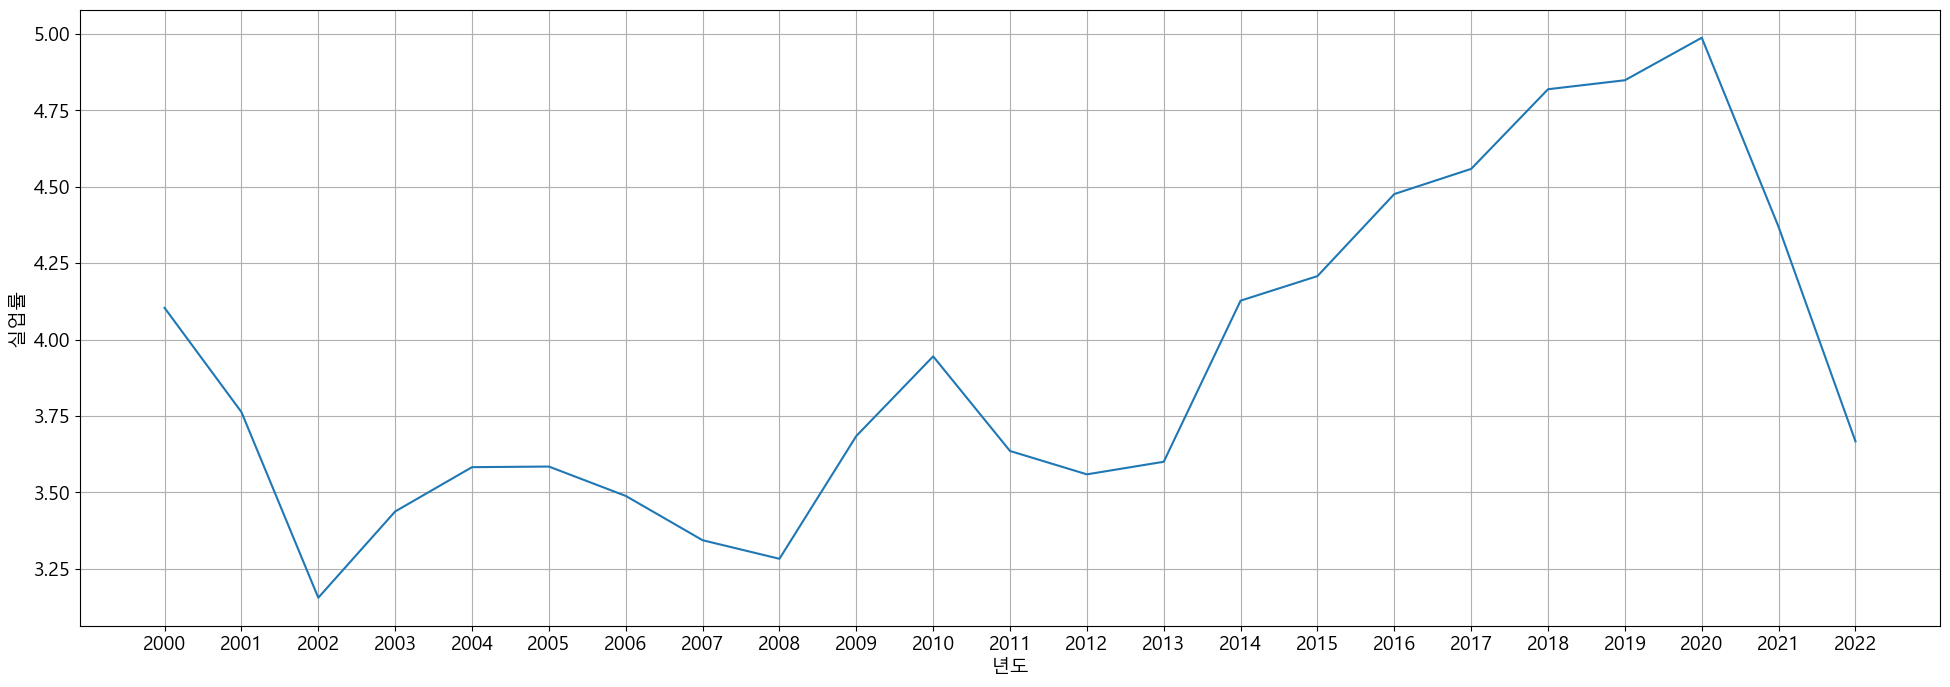

In [12]:
plt.figure()
sb.lineplot(data=tdf, x='년도', y='실업률')
plt.grid()
plt.show()
plt.close()

### 연도에 따른 전국 평균 실업률 변화 (연령대별)

In [14]:
tdf = df3.filter(['년도','연령계층별','실업률']).groupby(['년도','연령계층별'], as_index=False).mean()
tdf

,년도,연령계층별,실업률
0,2000,15-29세,7.735294
1,2000,30-59세,3.052941
2,2000,60세이상,1.523529
3,2001,15-29세,7.435294
4,2001,30-59세,2.605882
...,...,...,...
64,2021,30-59세,2.364706
65,2021,60세이상,3.570588
66,2022,15-29세,6.205882
67,2022,30-59세,1.982353


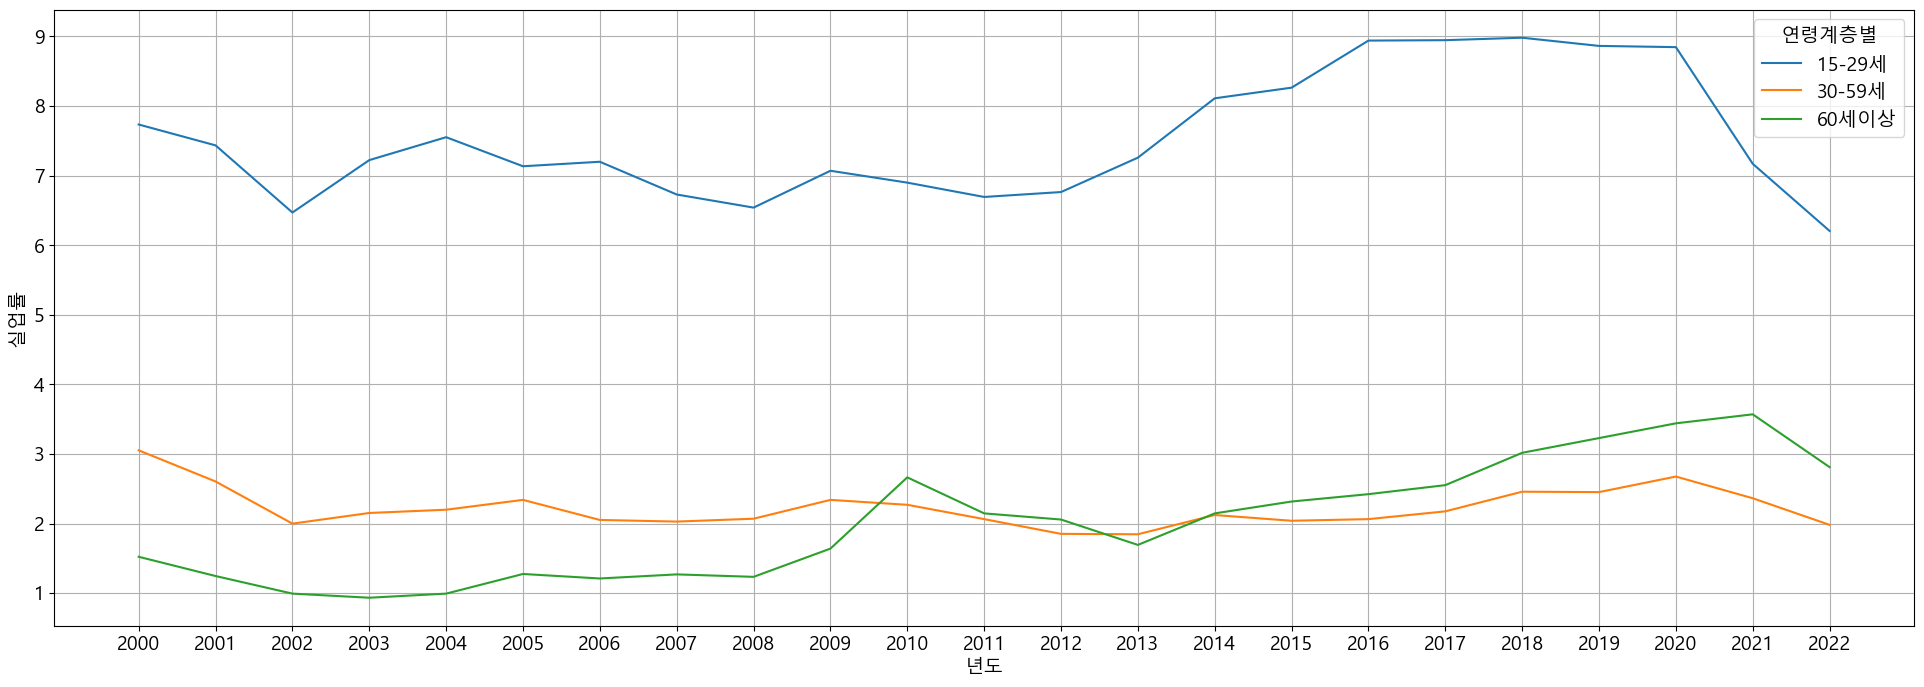

In [15]:
plt.figure()
sb.lineplot(data=tdf, x='년도', y='실업률', hue='연령계층별')
plt.grid()
plt.show()
plt.close()

### 지역별 서브플롯

In [16]:
area = df3['시도별'].unique()
area

array(['서울특별시', '부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시', '울산광역시',
       '세종특별자치시', '경기도', '강원도', '충청북도', '충청남도', '전라북도', '전라남도', '경상북도',
       '경상남도', '제주도'], dtype=object)

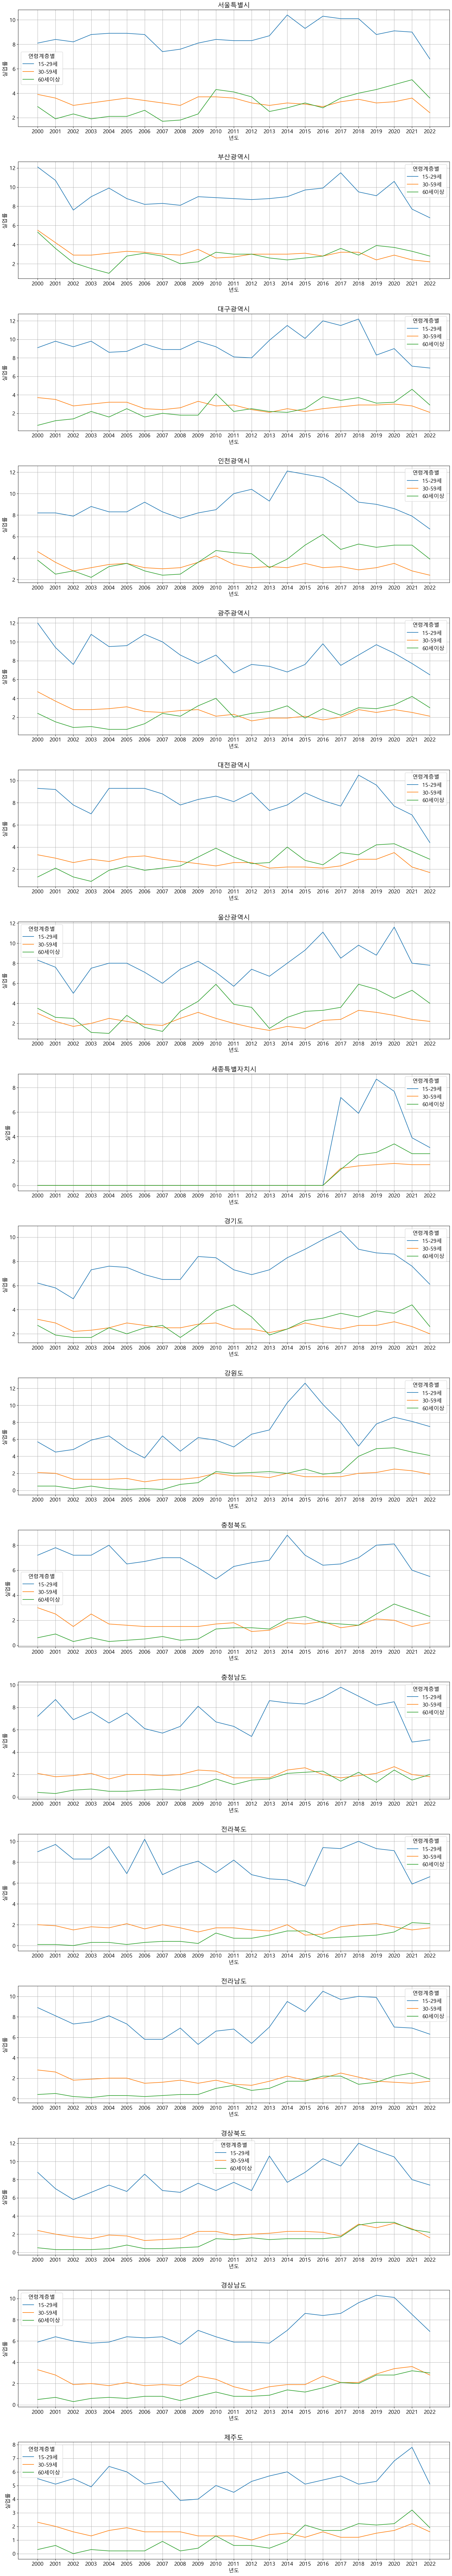

In [17]:
size = len(area)

fig, ax = plt.subplots(size, 1, figsize = (20,7 * size))
fig.subplots_adjust(hspace=0.3)

for i, v in enumerate(area):
    tdf = df3.query("시도별==@v")
    sb.lineplot(data=tdf, x='년도', y='실업률', hue='연령계층별', ax=ax[i])
    ax[i].grid()
    ax[i].title.set_text(v)

plt.show()
plt.close()

### 2열 서브플롯

In [18]:
size = len(area)
rows = int((size/2)+0.5)
rows

9

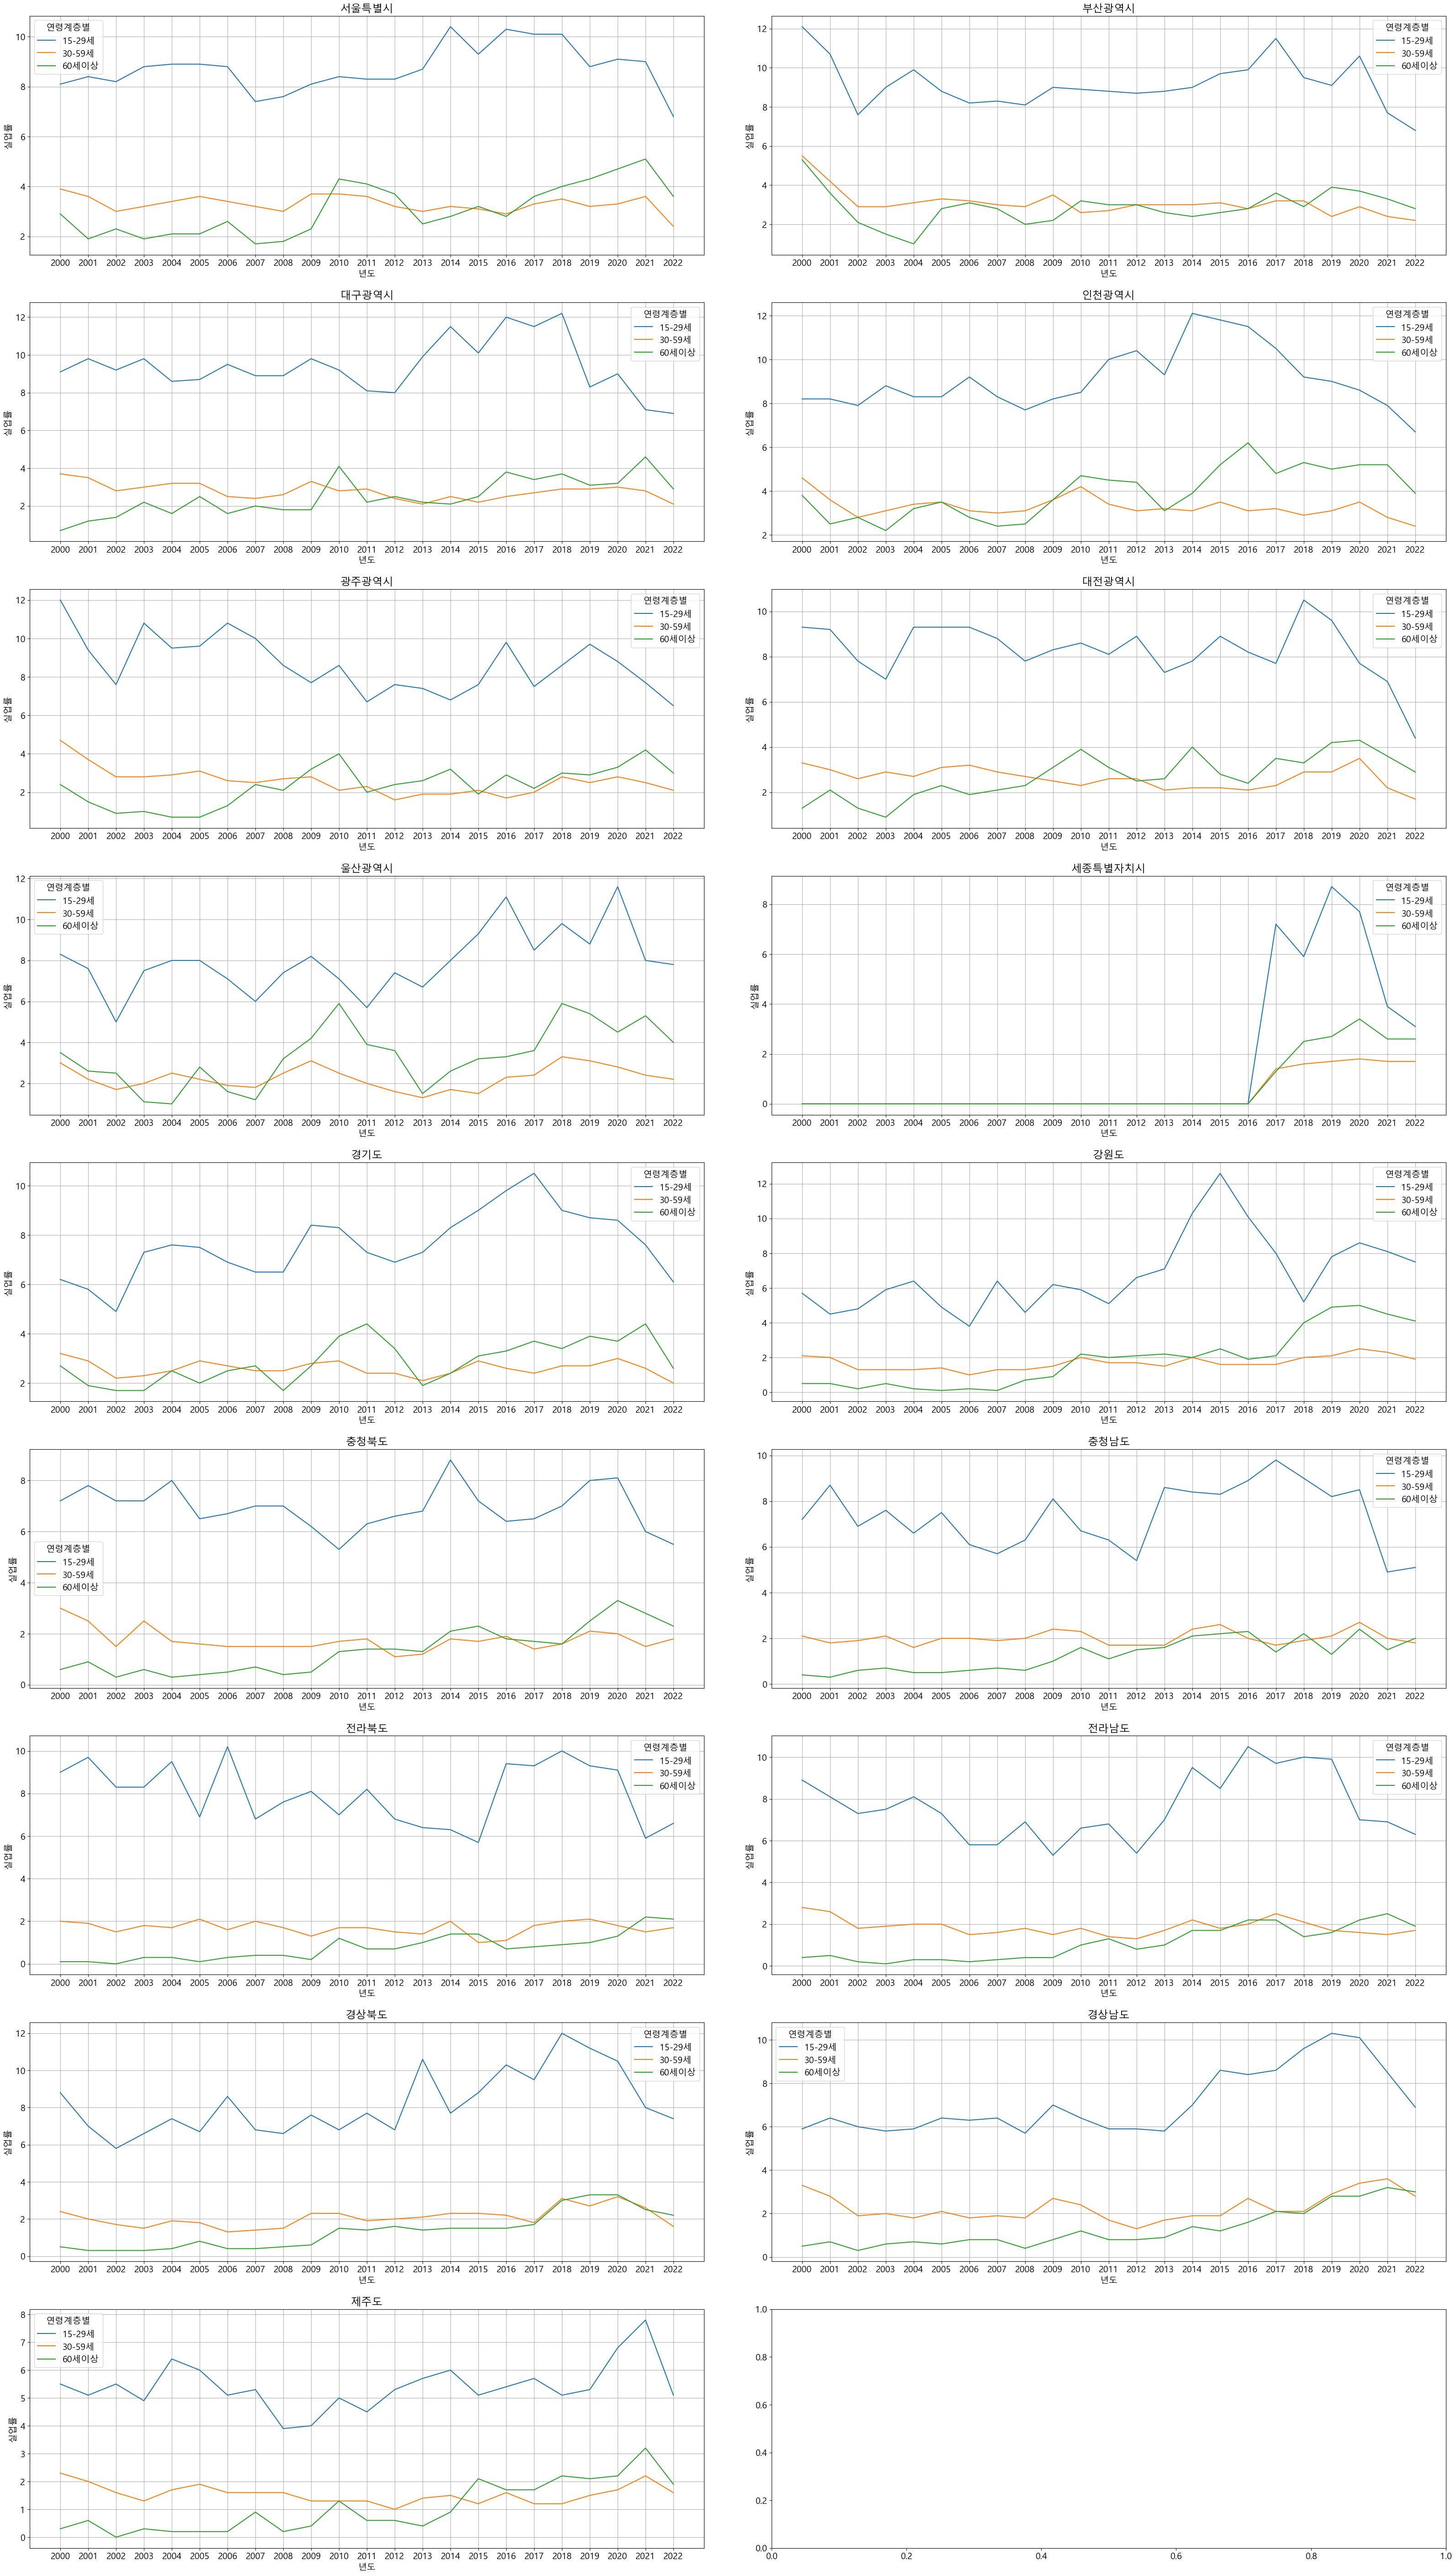

In [19]:
fig, ax = plt.subplots(rows, 2, figsize = (40,8 * rows) )
fig.subplots_adjust(wspace=0.1, hspace=0.2)

x=0

for i in range(0, rows):
    for j in range(0,2):
        if x >= size:
            break

        key = area[x]
        x+=1

        tdf = df3.query("시도별==@key")
        sb.lineplot(data=tdf, x='년도', y='실업률', hue='연령계층별', ax=ax[i][j])
        ax[i][j].grid()
        ax[i][j].title.set_text(key)

plt.show()
plt.close()